In [24]:
import numpy as np
import pandas as pd
import math, time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import mlrose_hiive as mlrose
from sklearn.metrics import accuracy_score


In [9]:
def load_data():
    df_train = pd.read_csv("data/mnist/csv_format/train.csv")
    df_test = pd.read_csv("data/mnist/csv_format/test.csv")
    X = []
    y = []
    for row in df_train.iterrows() :
        label = row[1][0]
        image = list(row[1][1:])
        image = np.array(image) / 255 #normalize vals
        X.append(image)
        y.append(label)

    X = np.array(X)
    y = np.array(y)
    sns.countplot(df_train['label'])
    plt.savefig("./output/label_count_mnist.png")
    return(X, y)

def split_data(X, y, data_size=1.0, train_size=0.8, strat=False):
    if strat:
        sss = StratifiedShuffleSplit(n_splits=1, random_state=0, train_size=train_size, test_size=train_size/4)
        for train_index, test_index in sss.split(X, y):
            print("hm")
            X_train = X[train_index]
            X_test = X[test_index]
            y_train, y_test = y[train_index], y[test_index]
    else:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size, test_size=train_size/4)
    return(X_train, y_train, X_test, y_test)


c:\users\fuers\anaconda3\envs\ml\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


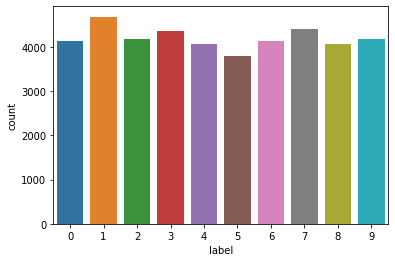

In [10]:
X, y = load_data()

In [14]:
X_train, y_train, X_test, y_test = split_data(X, y, train_size=0.08)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(3360, 784)
(3360,)
(840, 784)
(840,)


In [18]:
num_category = 10 

y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)

In [36]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [8], activation = 'relu',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 1000,
                                 bias = True, 
                                 is_classifier = True,
                                 learning_rate = 0.001, 
                                 early_stopping = True, 
                                 max_attempts = 100,
                                 random_state = 3
                                )


nn_model1.fit(X_train, y_train)
y_train_pred = nn_model1.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)

0.2925595238095238


In [56]:
nn_model1 = mlrose.NeuralNetwork(hidden_nodes = [10], activation = 'sigmoid',
                                 algorithm = 'gradient_descent', 
                                 max_iters = 100,
                                 bias = True, 
                                 is_classifier = True,
                                 learning_rate = 0.0011, 
                                 early_stopping = True, 
                                 max_attempts = 100,
                                 random_state = 3,
                                 curve = True
                                )


nn_model1.fit(X_train, y_train)
y_train_pred = nn_model1.predict(X_train)
y_train_accuracy = accuracy_score(y_train, y_train_pred)
print(y_train_accuracy)
print(nn_model1.fitness_curve)

0.7544642857142857
[-2.78325271 -2.44012097 -2.25067138 -2.13587584 -2.02205261 -1.95137548
 -1.84689585 -1.7915958  -1.72029096 -1.67499717 -1.6265984  -1.58976491
 -1.55448848 -1.52341735 -1.49336528 -1.46497618 -1.43749248 -1.41099537
 -1.38549165 -1.36090417 -1.33717438 -1.31440408 -1.29277669 -1.27228542
 -1.25270776 -1.23384724 -1.21564517 -1.19818042 -1.1815761  -1.1659036
 -1.15117923 -1.13732578 -1.1242177  -1.1117581  -1.09987537 -1.08849315
 -1.07755381 -1.06705858 -1.05705098 -1.04756591 -1.03860647 -1.03014755
 -1.0221517  -1.01457799 -1.00737097 -1.00046888 -0.99383243 -0.9874479
 -0.9813124  -0.97541862 -0.96973864 -0.96421963 -0.95880477 -0.9534758
 -0.94827444 -0.94325655 -0.9384438  -0.93382975 -0.92939133 -0.92509386
 -0.92090277 -0.91679512 -0.91276421 -0.90881639 -0.90496471 -0.90122233
 -0.89759958 -0.89410709 -0.8907599  -0.88757421 -0.8845546  -0.88168632
 -0.87894623 -0.8763214  -0.87381821 -0.87145578 -0.86925024 -0.86720564
 -0.86531615 -0.86356643 -0.8619278

0.23392857142857143


In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

history = model.fit(X_train, y_train_oh, epochs=20, verbose=1, batch_size=32,  validation_split=.1)